In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dat
from datetime import timedelta

In [ ]:
# # Read in the relevant attributes
# nodevice = 'New Data/Hub_traffic.xlsx'
# lamppaired = 'New Data/lamptraffic.xlsx'

# xls = pd.ExcelFile(nodevice)
# #read the data as a timeseries data
# df = pd.read_excel(xls, 'sheet1', parse_dates=[1], index_col=1)  
# df = df[:3600*5]              # work with 5hour data
# df.tail()

,Time,Source,Destination,Protocol,Length,Dest MAC,Time since first frame in this TCP stream,Time since previous frame in this TCP stream,Length.1,Info
No.,,,,,,,,,,
43,6.328769,99.80.34.212,192.168.0.100,TLSv1.2,119,"00:1c:2b:1a:63:95,d8:47:32:02:4d:12",6.305553,5.997895,48.0,Encrypted Alert
44,6.372481,192.168.0.100,99.80.34.212,TCP,66,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",6.349265,0.043712,NaN,49266 > 443 [ACK] Seq=1938 Ack=6106 Win=6412...
45,8.329709,99.80.34.212,192.168.0.100,TCP,66,"00:1c:2b:1a:63:95,d8:47:32:02:4d:12",8.306493,1.957228,NaN,"443 > 49266 [FIN, ACK] Seq=6106 Ack=1938 Win..."
46,8.372318,192.168.0.100,99.80.34.212,TCP,66,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",8.349102,0.042609,NaN,49266 > 443 [ACK] Seq=1938 Ack=6107 Win=6412...
47,112.608526,192.168.0.100,99.80.34.212,TCP,66,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",112.585310,104.236208,NaN,"49266 > 443 [RST, ACK] Seq=1991 Ack=6107 Win..."


In [ ]:
print(df.shape)
df.Protocol.value_counts()

(47, 10)


TCP        29
TLSv1.2    16
DNS         2
Name: Protocol, dtype: int64

In [ ]:
# hub_IP = '192.168.0.100'                           # hub IP address
# hub_IP2 = 'Alertmec_1a:63:95'
# # hup_IP3 = 'fe80::21c:2bff:fe1a:6395'
hub_df = df.query('Source=="192.168.0.101" \
                | Source=="Alertmec_1a:63:95" \
                | Source=="fe80::21c:2bff:fe1a:6395" \
                | Destination=="192.168.0.101"\
                | Destination=="Alertmec_1a:63:95"\
                | Destination=="fe80::21c:2bff:fe1a:6395"\
                ')    #filter for where both souce and destination contain te hub IP
                  
# hub_df = df.query('Source=="192.168.0.101" \
#                 | Destination=="192.168.0.101"\
#                                 ')    #filter for where both souce and destination contain te hub IP
hub_df.head()

,No.,Source,Destination,Protocol,Length,Dest MAC,Time since first frame in this TCP stream,Time since previous frame in this TCP stream,Length.1,Info
Time,,,,,,,,,,
7.450535,14,192.168.0.101,52.210.184.200,TCP,66,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",0.000000,0.000000,NaN,58088 > 443 [ACK] Seq=1 Ack=1 Win=8292 Len=0...
7.470207,15,52.210.184.200,192.168.0.101,TCP,66,"00:1c:2b:1a:63:95,d8:47:32:02:4d:12",0.019672,0.019672,NaN,[TCP ACKed unseen segment] 443 > 58088 [ACK]...
8.218477,16,192.168.0.101,34.240.107.124,TCP,66,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",0.000000,0.000000,NaN,49730 > 443 [ACK] Seq=1 Ack=1 Win=1002 Len=0...
8.239882,17,34.240.107.124,192.168.0.101,TCP,66,"00:1c:2b:1a:63:95,d8:47:32:02:4d:12",0.021405,0.021405,NaN,[TCP ACKed unseen segment] 443 > 49730 [ACK]...
12.326846,18,192.168.0.101,52.210.184.200,TLSv1.2,97,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",4.876311,4.856639,26,"[TCP Previous segment not captured] , Applicat..."


In [ ]:
print(hub_df.shape)
hub_df.Protocol.value_counts()

(7991, 10)


TCP        5500
TLSv1.2    2211
ARP         178
MDNS         49
DNS          20
NTP          18
DHCP         10
ICMPv6        5
Name: Protocol, dtype: int64

<AxesSubplot:xlabel='Protocol', ylabel='count'>

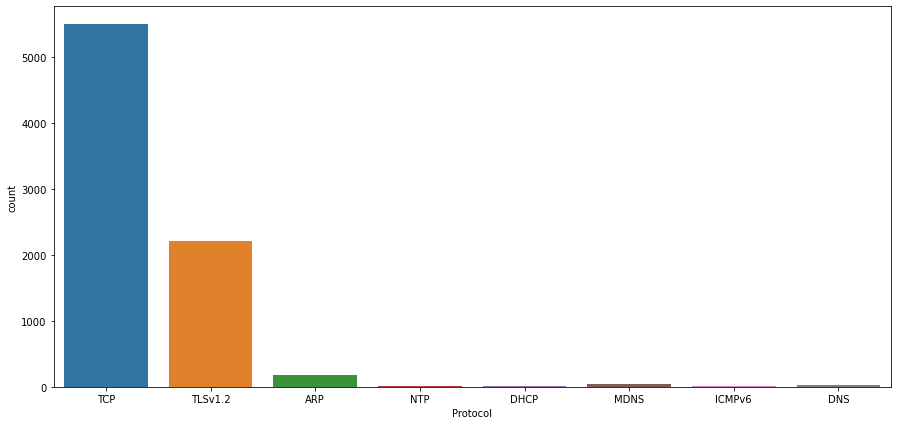

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Protocol', data=hub_df)

### Plot total Size of byte per protocol

,Length
Protocol,
ARP,11036
DHCP,4610
DNS,2324
ICMPv6,350
MDNS,14108
NTP,1620
TCP,518942
TLSv1.2,266327


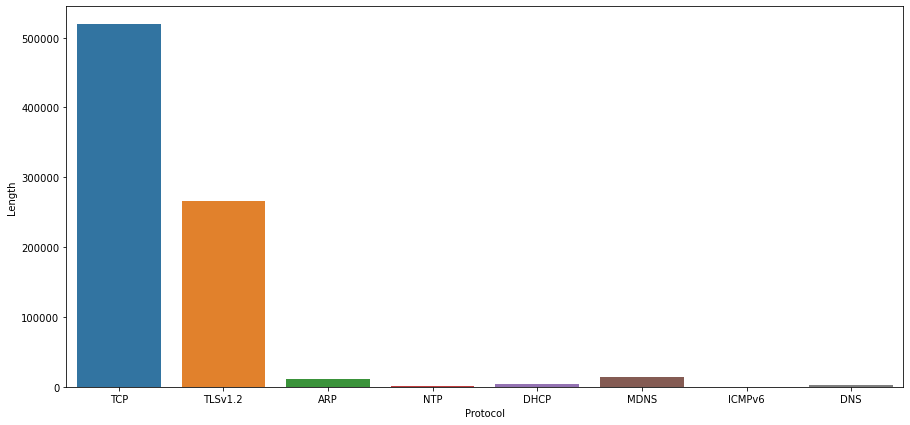

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='Protocol', y='Length', data=hub_df, ci=None, estimator=np.sum)
hub_df[['Protocol', 'Length']].groupby('Protocol').sum()


# # Get the total bytes (in KB) per protocol
# protocol_length = hub_df[['Protocol', 'Length']].groupby('Protocol').sum().apply(lambda x: x/1000).reset_index()
# sns.barplot(x='Protocol', y='Length', data=protocol_length)

### Event triggered activity
we will need to differentiate between periodic and scheduled events

<AxesSubplot:xlabel='Time'>

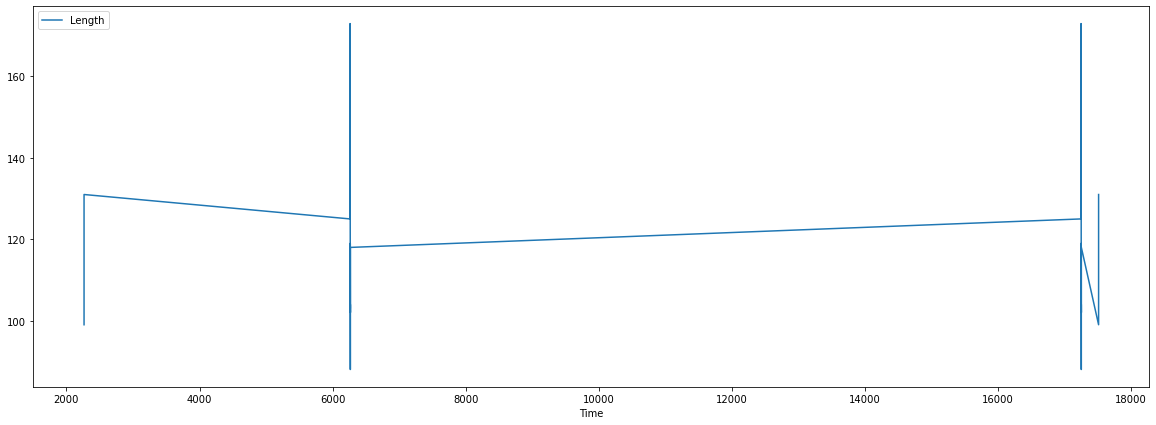

In [ ]:
hub_dns = hub_df.query('Protocol == "DNS"')
hub_dns.plot(y='Length',  figsize=(20,7))
#print(hub_dns['Length'].unique())

#### total byte per time
show the increase in bytes as time progresses

In [ ]:
#combine the protocol and lenght attribute as one
df['Protocol_Length'] = df['Protocol'] + '_' + df['Length'].astype(str)

#drop the Protocol and Length attributes
df.drop(['Protocol','Length'], axis = 1, inplace = True)

df.head()

,No.,Source,Destination,Dest MAC,Time since first frame in this TCP stream,Time since previous frame in this TCP stream,Length.1,Info,Protocol_Length
Time,,,,,,,,,
0.000000,1,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_306
0.103674,2,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_315
0.207636,3,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_378
0.311739,4,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_370
0.415760,5,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_315


In [ ]:
data = ['DNS_Event','time since reference or first frame','Protocol_length','time delta from previous DNS or first frame','Contain MDNS_103 (among packets within preceeding 8seconds)','TCP_66_TLSv_99_TCP_66','TLSv_97_TLSv_97_TCP_66']


In [ ]:
#filter out the response DNS packets 
df = df[df['Protocol_Length'] != 'DNS_118'].reset_index()
df.head()
#try make the index same as original. consider values.index

,Time,No.,Source,Destination,Dest MAC,Time since first frame in this TCP stream,Time since previous frame in this TCP stream,Length.1,Info,Protocol_Length
0,0.000000,1,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_306
1,0.103674,2,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_315
2,0.207636,3,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_378
3,0.311739,4,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_370
4,0.415760,5,192.168.0.1,239.255.255.250,"01:00:5e:7f:ff:fa,d8:47:32:02:4d:12",NaN,NaN,NaN,NOTIFY * HTTP/1.1,SSDP_315


In [ ]:

# work with 24hour data
data = 'New Data/manualflow.csv'
# data = 'New Data/schedflowvol.csv'
# data = 'New Data/googleappflowvol1.csv'
# data = 'New Data/hiveappflowvol.csv'

# Task 2

### Flow volume (total no of bytes)

In [24]:
flow_volume = []
flow_duration= []
modes = ['homekit', 'hiveapp', 'googleapp', 'sched', 'manual']

for mode in modes:
    data = f'New Data/{mode}flowvol.csv'
    df = pd.read_csv(data, index_col=0)
    flow_volume.append(sum(df['Length']))
    flow_duration.append(round(df.Time.tail(1).values[-1],2))

FileNotFoundError: [Errno 2] No such file or directory: 'New Data/homekitflowvol.csv'

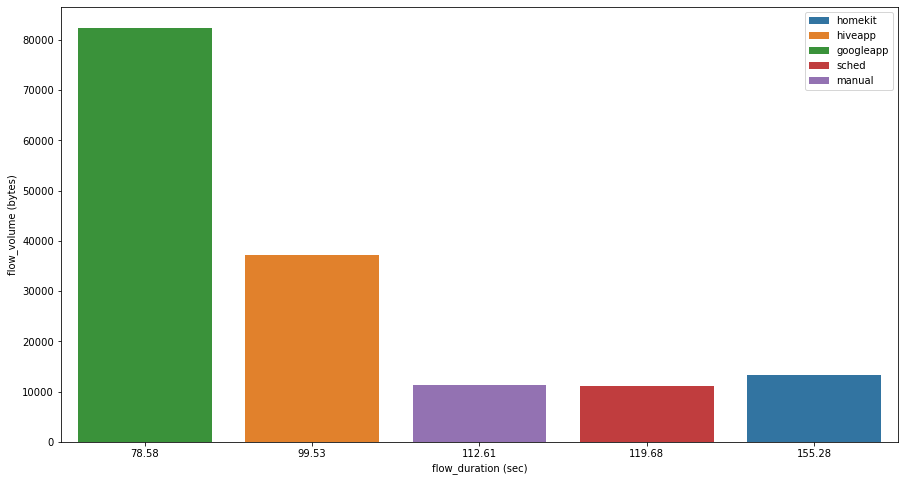

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x=flow_duration, y=flow_volume, hue=modes, dodge=False)
ax.set(xlabel ='flow_duration (sec)', ylabel ='flow_volume (bytes)')
ax.set_title('')
plt.savefig('New Data/plot.png', dpi=300)

In [ ]:
export_df = pd.DataFrame(data={'flow_volume (byte)':flow_volume,'flow_duration (sec)':flow_duration}, index=modes)
export_df.to_csv('New Data/flow.csv')
export_df

,flow_volume (byte),flow_duration (sec)
homekit,13364,155.28
hiveapp,37271,99.53
googleapp,82429,78.58
sched,11037,119.68
manual,11310,112.61


## Scenerios

In [ ]:
flow_vol = []
flow_dur= []
device_df1 = pd.read_csv('New Data/allvssingledevice1.csv', index_col=0)
device_df2 = pd.read_csv('New Data/allvssingledevice2.csv', index_col=0)


integrated_df1 = device_df1[:208]
single_df1 = device_df1[208:]
integrated_df2 = device_df2[:424]
single_df2 = device_df2[424:]

for df_ in [integrated_df1, single_df1, integrated_df2, single_df2]:
    flow_vol.append(sum(df_['Length']))
    flow_dur.append(round((df_['Time'].values[-1]-df_['Time'].values[0]),2))

index = ['integraded', 'single','integraded', 'single'] 
export_df = pd.DataFrame(data={'flow_volume (byte)':flow_vol,'flow_duration (sec)':flow_dur, 'scenerios':[1,1,2,2]}, index=index)
export_df.to_csv('New Data/flow2.csv')
export_df

,flow_volume (byte),flow_duration (sec),scenerios
integraded,53810,119.77,1
single,10928,113.84,1
integraded,127042,96.39,2
single,34705,80.70,2


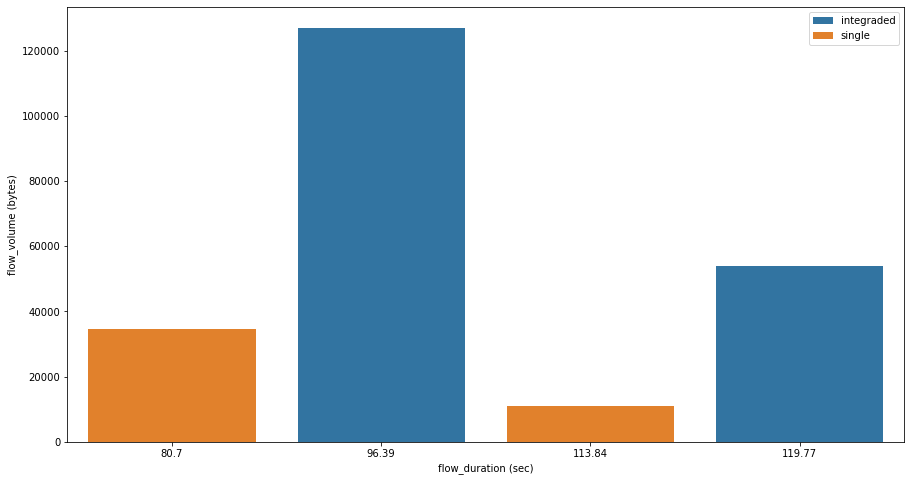

In [ ]:
index = export_df.index
plt.figure(figsize = (15,8))
ax = sns.barplot(x='flow_duration (sec)', y='flow_volume (byte)', data=export_df, hue=index,  dodge=False)
ax.set(xlabel ='flow_duration (sec)', ylabel ='flow_volume (bytes)')
ax.set_title('')
plt.savefig('New Data/plot2.png', dpi=300)

## Modes

In [ ]:
dnsall_df = pd.read_csv('New Data/dns102merged.csv', index_col=1)
#dnsall_df = pd.read_csv('New Data/dns102eventtriggermerged.csv', index_col=0)
dnsall_df['Time'] = dnsall_df['Time']/60
dnsall_df.head()


,mode,Time,Source,Destination,Protocol,Length,Dest MAC,Time since first frame in this TCperiodic stream,Time since periodicrevious frame in this TCperiodic stream,Length2,Info
No.,,,,,,,,,,,
1,scheduled,0.000000,192.168.0.100,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",Event,Event,Event,Standard query 0xda5f A kinesis.eu-west-1.amaz...
2,periodic,4.551565,192.168.0.100,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",Event,Event,Event,Standard query 0x772f A kinesis.eu-west-1.amaz...
3,periodic,23.584983,192.168.0.100,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",Event,Event,Event,Standard query 0x7bd7 A kinesis.eu-west-1.amaz...
4,periodic,42.572666,192.168.0.100,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",Event,Event,Event,Standard query 0x5e6e A kinesis.eu-west-1.amaz...
5,periodic,61.569761,192.168.0.100,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",Event,Event,Event,Standard query 0x3e3b A kinesis.eu-west-1.amaz...


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


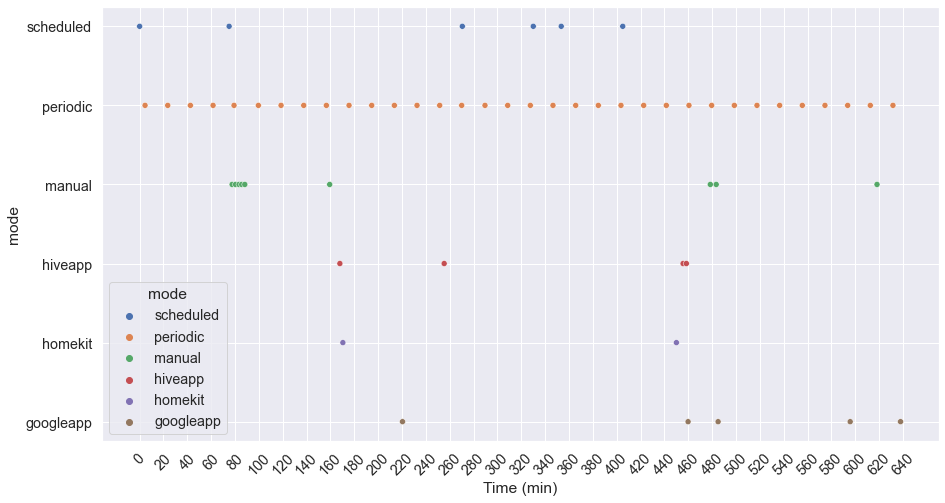

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.scatterplot('Time', 'mode', data =dnsall_df, hue='mode')
ax.set_xticks(np.arange(0, max(dnsall_df.Time)+19, 20))
plt.xticks(rotation=45)
ax.set(xlabel ='Time (min)')
plt.savefig('New Data/plot3.png', dpi=300)

## DNSs

In [ ]:
lampdf = pd.read_csv('New Data/lampdnseventfiltered.csv', parse_dates=[1], index_col=1)
plugdf = pd.read_csv('New Data/plugdnseventfiltered.csv', parse_dates=[1], index_col=1)
motionsendf = pd.read_csv('New Data/motionsensorDNSeventfilter.csv', parse_dates=[1], index_col=1)


for dtt in [lampdf,plugdf,motionsendf]:
    dtt.Length = 102

motionsendf

,No.,Source,Destination,Protocol,Length,Dest MAC,Time since first frame in this TCP stream,Time since previous frame in this TCP stream,Length.1,Info
Time,,,,,,,,,,
2021-08-23 08:34:17.655849,1,192.168.0.101,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",NaN,NaN,NaN,Standard query 0x2079 A kinesis.eu-west-1.amaz...
2021-08-23 08:39:17.933620,2,192.168.0.101,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",NaN,NaN,NaN,Standard query 0x3509 A kinesis.eu-west-1.amaz...
2021-08-23 09:06:00.131448,3,192.168.0.101,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",NaN,NaN,NaN,Standard query 0xa7cf A kinesis.eu-west-1.amaz...
2021-08-23 09:11:01.558139,4,192.168.0.101,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",NaN,NaN,NaN,Standard query 0xc66b A kinesis.eu-west-1.amaz...
2021-08-23 09:21:16.794809,5,192.168.0.101,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",NaN,NaN,NaN,Standard query 0x1516 A kinesis.eu-west-1.amaz...
2021-08-23 09:26:18.184753,6,192.168.0.101,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",NaN,NaN,NaN,Standard query 0x142a A kinesis.eu-west-1.amaz...
2021-08-23 09:59:05.146587,7,192.168.0.101,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",NaN,NaN,NaN,Standard query 0x669e A kinesis.eu-west-1.amaz...
2021-08-23 10:04:06.657653,8,192.168.0.101,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",NaN,NaN,NaN,Standard query 0xc0f4 A kinesis.eu-west-1.amaz...
2021-08-23 12:12:28.379657,9,192.168.0.101,192.168.0.1,DNS,102,"d8:47:32:02:4d:12,00:1c:2b:1a:63:95",NaN,NaN,NaN,Standard query 0xeb15 A c3t5k8kx91jab4.credent...


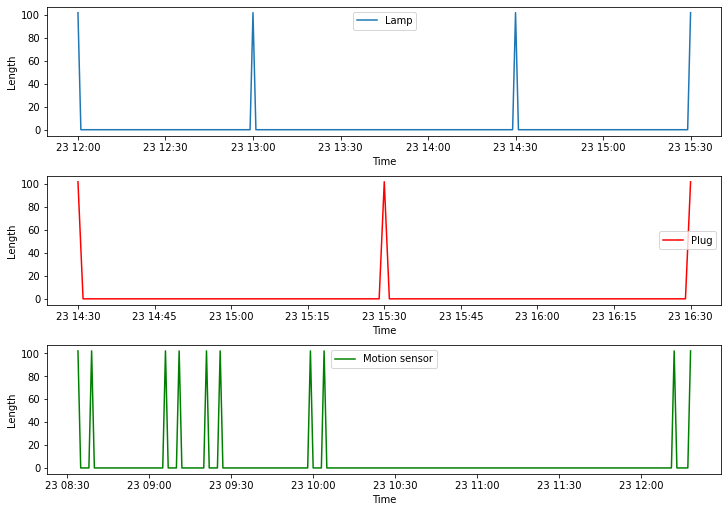

In [ ]:
dt = lampdf[['Length', 'Protocol']].resample(rule='min').sum()
dt1 = plugdf[['Length', 'Protocol']].resample(rule='min').sum()
dt2 = motionsendf[['Length', 'Protocol']].resample(rule='min').sum()

fig, axes = plt.subplots(3, figsize=(10,7), constrained_layout=True, sharex=False, sharey=False)
sns.lineplot(data = dt, x=dt.index, y='Length', ax=axes[0], label='Lamp')
sns.lineplot(data = dt1, x=dt1.index, y='Length', ax=axes[1], color='red', label='Plug')
sns.lineplot(data = dt2, x=dt2.index, y='Length', ax=axes[2], color='green', label='Motion sensor')
plt.savefig('New Data/plot5.png', dpi=300)

<AxesSubplot:xlabel='Time', ylabel='Length'>

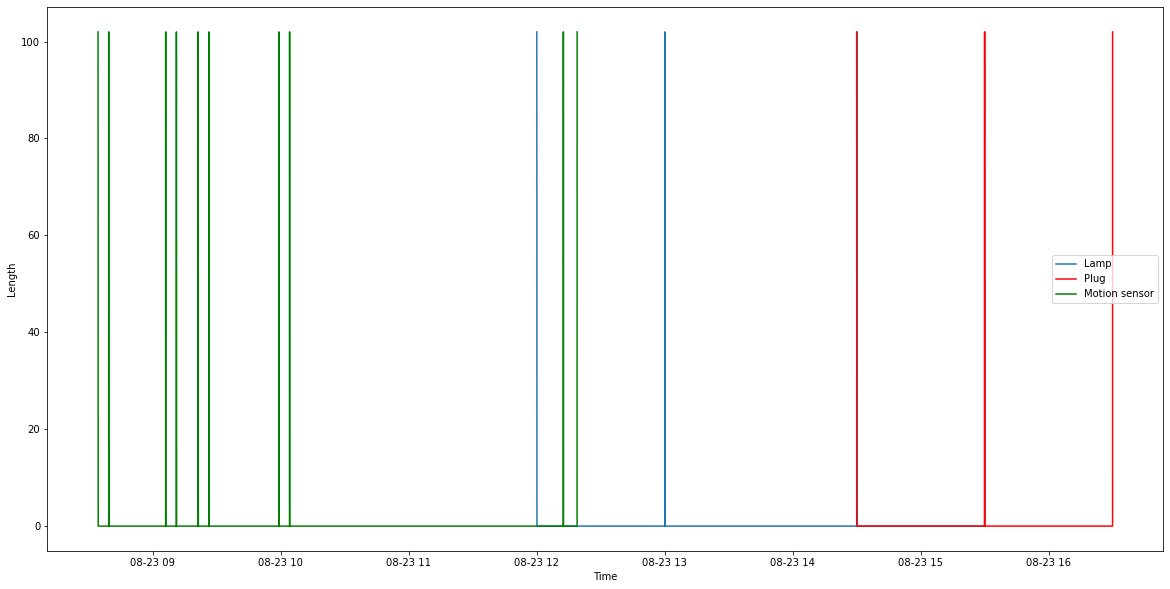

In [ ]:
# fig, axes = plt.subplots(3, figsize=(10,7), constrained_layout=True, sharex=True, sharey=False) 
# ax[0].plot(dt.index, dt.Length)
# ax[1].plot(dt1.index, dt1.Length)
# ax[2].plot(dt2.index, dt2.Length)
# plt.xticks(rotation=45)

dt = lampdf[['Length', 'Protocol']].resample(rule='s').sum()
dt1 = plugdf[['Length', 'Protocol']].resample(rule='s').sum()
dt2 = motionsendf[['Length', 'Protocol']].resample(rule='s').sum()

plt.figure(figsize=(20,10))
# plt.set(xlabel ='Time (sec)')
sns.lineplot(data = dt, x=dt.index, y='Length',label='Lamp')
sns.lineplot(data = dt1, x=dt1.index, y='Length',  color='red', label='Plug')
sns.lineplot(data = dt2, x=dt2.index, y='Length',  color='green', label='Motion sensor')
# plt.savefig('New Data/dnscombo.png', dpi=300)


(array([18862.375     , 18862.41666667, 18862.45833333, 18862.5       ,
        18862.54166667, 18862.58333333, 18862.625     , 18862.66666667]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

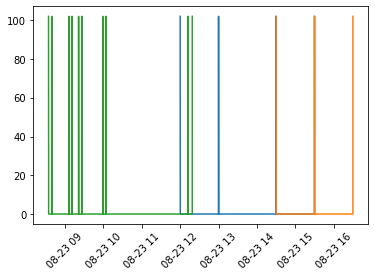

In [ ]:
plt.subplots(sharex=False, sharey=True)
plt.plot(dt.index, dt.Length)#, kind='line')
plt.plot(dt1.index, dt1.Length)
plt.plot(dt2.index, dt2.Length)
plt.xticks(rotation=45)

# plt.set(xlabel ='Time (sec)')
# # Share both X and Y axes with all subplots
# for dfm in [lampdf, plugdf, motionsendf]:
#     plt.figure(figsize = (20,10))
#     plt.subplots(sharex=True, sharey=True)
#     dt = dfm[['Length', 'Protocol']].groupby(pd.Grouper(freq='min')).sum()
#     plt.plot(dt.index, dt.Length)

## Counts 

In [28]:
idlendf = pd.read_csv('../data/ideldataset.csv', parse_dates=[1], index_col=1)
filterdf = pd.read_csv('../data/hubfiltered.csv', parse_dates=[1], index_col=1)
# mergeddf = pd.read_csv('../data/alldevicesfiltered01.csv', parse_dates=[1], index_col=1)
mergeddf = pd.read_csv('../data/filteredmergeddataset.csv', parse_dates=[1], index_col=1)

# filter the first 1hr 40mins packets 
idlendf = idlendf[:idlendf.index[0]  + timedelta(hours=1, minutes=40)]
filterdf = filterdf[:filterdf.index[0]  + timedelta(hours=1, minutes=40)]
mergeddf = mergeddf[:mergeddf.index[0]  + timedelta(hours=1, minutes=40)]

# filterdf = filterdf[:"2021--04-01 17:57:36.274900"]
# mergeddf = mergeddf[:"2021-06-30 12:42:36.520313"]

print(idlendf.index[-1] - idlendf.index[0])
print(filterdf.index[-1] - filterdf.index[0])
print(mergeddf.index[-1] - mergeddf.index[0])

filterdf.head()

0 days 01:39:55.053283
0 days 01:39:55.987399
0 days 01:39:59.814139


,No.,Source,Destination,Protocol,Length,Info
Time,,,,,,
2021-04-01 15:57:36.274900,1,192.168.0.101,52.210.184.200,TCP,66,58088 > 443 [ACK] Seq=1 Ack=1 Win=8292 Len=0...
2021-04-01 15:57:36.294572,2,52.210.184.200,192.168.0.101,TCP,66,[TCP ACKed unseen segment] 443 > 58088 [ACK]...
2021-04-01 15:57:37.042842,3,192.168.0.101,34.240.107.124,TCP,66,49730 > 443 [ACK] Seq=1 Ack=1 Win=1002 Len=0...
2021-04-01 15:57:37.064247,4,34.240.107.124,192.168.0.101,TCP,66,[TCP ACKed unseen segment] 443 > 49730 [ACK]...
2021-04-01 15:57:41.151211,5,192.168.0.101,52.210.184.200,TLSv1.2,97,"[TCP Previous segment not captured] , Applicat..."


In [29]:
print("Protocol count for Unpaired state")
print(filterdf['Protocol'].value_counts())
print()
print("Protocol count for Idle state")
print(idlendf['Protocol'].value_counts())
print()
print("Protocol count for Active state")
print(mergeddf['Protocol'].value_counts())

Protocol count for Unpaired state
TCP        1735
TLSv1.2     704
NTP           6
DHCP          4
DNS           2
Name: Protocol, dtype: int64

Protocol count for Idle state
TCP        3118
TLSv1.2    1434
DNS          34
NTP          12
DHCP          2
Name: Protocol, dtype: int64

Protocol count for Active state
TCP        2466
TLSv1.2    1069
DNS          48
MDNS         20
NTP           6
DHCP          4
Name: Protocol, dtype: int64


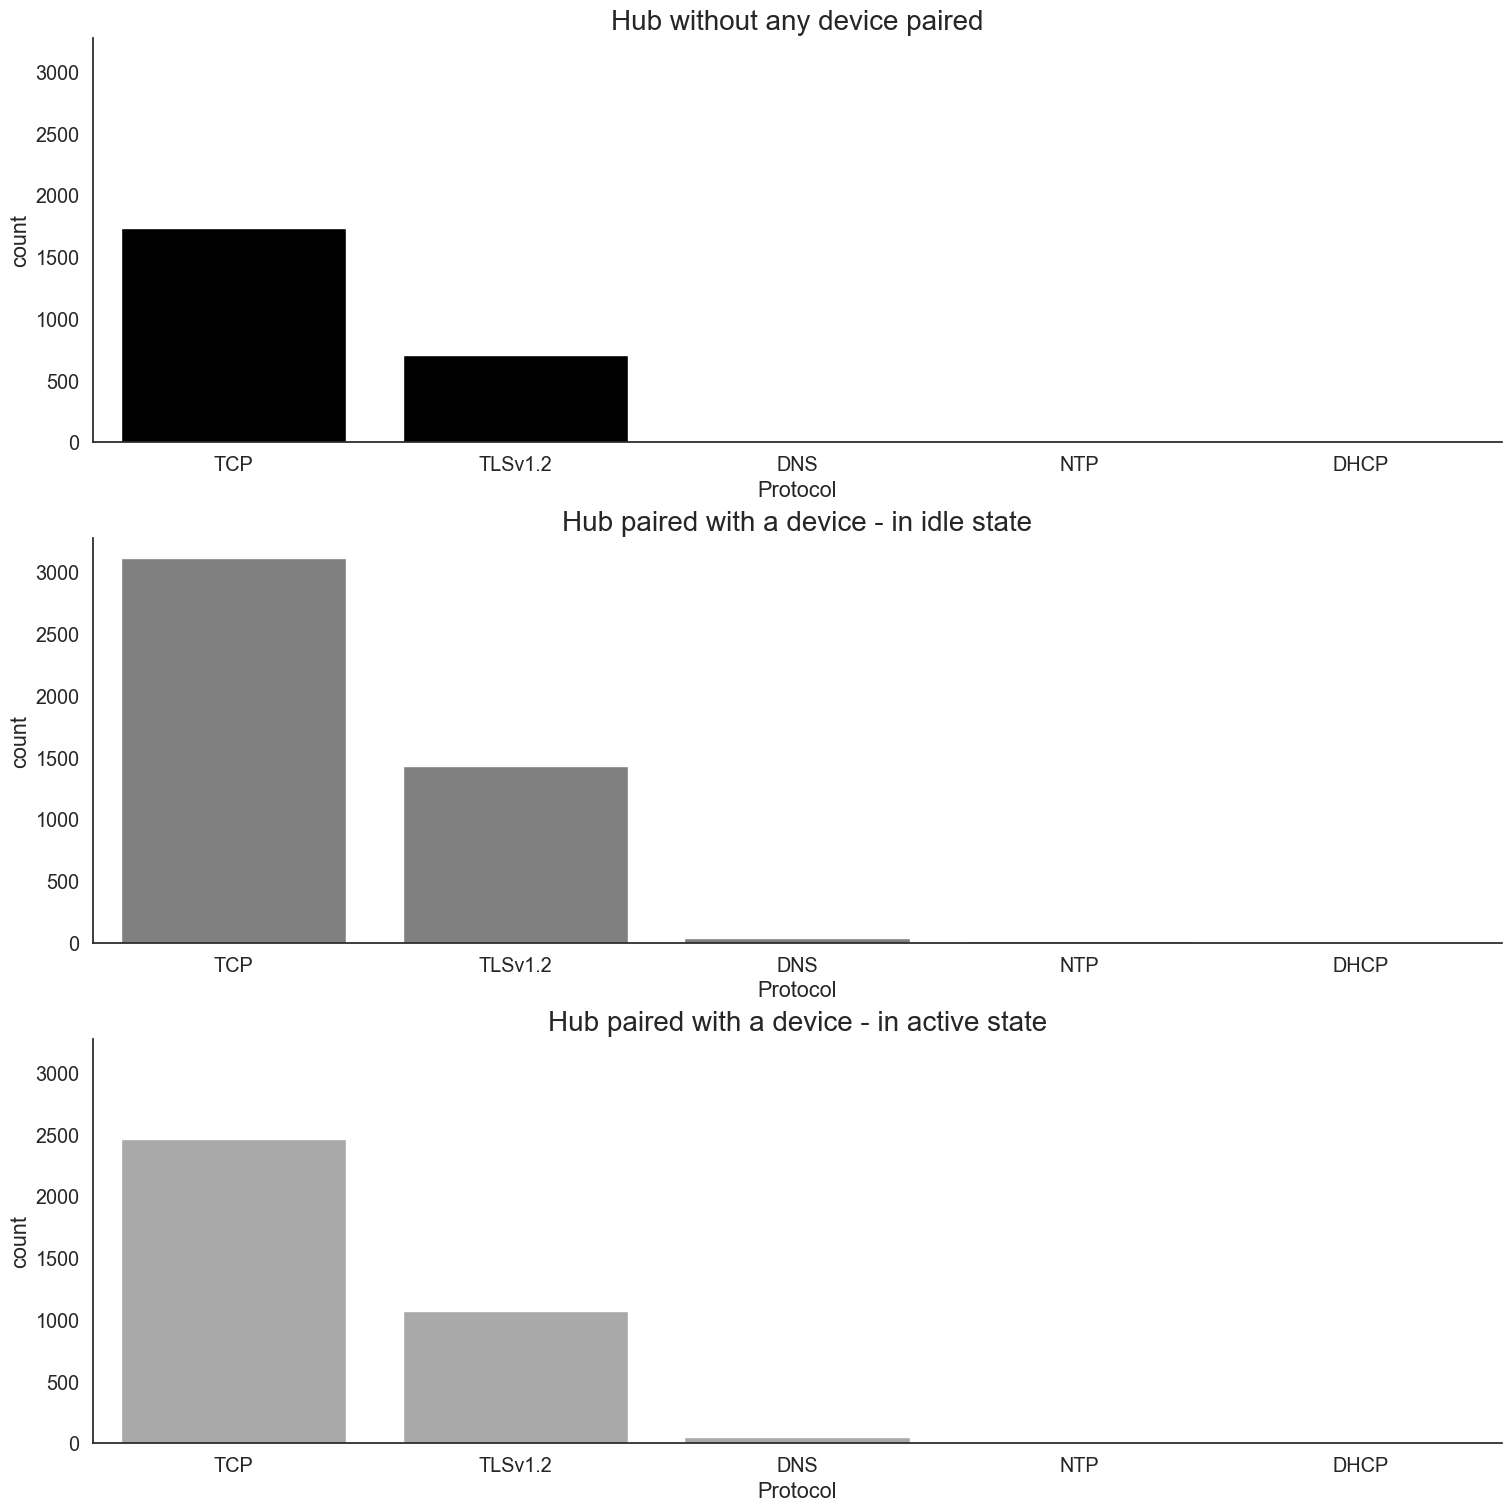

In [30]:
order_by = ['TCP', 'TLSv1.2', 'DNS', 'NTP', 'DHCP']

# plt.figure(figsize = (15,8))
sns.set(font_scale=1.3)
sns.set_style('white') 
fig, ax = plt.subplots(3, figsize=(15,15), constrained_layout=True, sharey=True)
sns.countplot(x='Protocol', data=filterdf, color='black', ax=ax[0], dodge=False, order=order_by).set_title('Hub without any device paired', fontsize=20)
sns.countplot(x='Protocol', data=idlendf, color='grey', ax=ax[1], dodge=False, order=order_by).set_title('Hub paired with a device - in idle state', fontsize=20)
sns.countplot(x='Protocol', data=mergeddf, color='darkgrey', ax=ax[2], dodge=False, order=order_by).set_title('Hub paired with a device - in active state', fontsize=20)
sns.despine()

plt.savefig('../images/Statecombo.png', dpi=300)

## Google cast mode

In [ ]:
Contain_MDNS103 = []
event_counter = 0
a = 0 
values = df['Protocol_Length'].values
GCast_indexno = []
DNS_EventID = []

for i in range(len(values)):
    if values[i] == 'DNS_102'and np.array(df.loc[[i-5,i-3,i-2, i-1], 'Protocol_Length'].values == ['TCP_1506', 'TCP_66', 'TLSv1.2_99', 'TCP_66']).all():
        event_counter += 1
        GCast_indexno.append(i)
        DNS_EventID.append(event_counter)  
        
        #check the protocol of packets within last 8 seconds for any MDNS_103
        if df['Protocol_Length'][a:i].isin(['MDNS_103']).any():
            Contain_MDNS103.append(True)
        a = i

print(DNS_EventID, GCast_indexno)
print(Contain_MDNS103)

GCast_time = df.loc[GCast_indexno, 'Time'].values
Time_reference = []
x = 0

for i in GCast_time:
    x = i - x
    Time_reference.append(np.round(x,2))
    x = i    
print(Time_reference)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [96, 361, 579, 1070, 1304, 1573, 1806, 3066, 3693, 3889, 4110]
[True, True, True, True, True, True, True, True, True, True, True]
[10.69, 227.95, 113.79, 668.72, 172.19, 249.11, 160.19, 1442.98, 381.2, 65.23, 107.61]


In [ ]:

print(df[df['Protocol_Length'] == 'DNS_102'])

a = []
for i in range(len(values)):
    if values[i] == 'DNS_102':
        a.append(i)
print(a)

for i in a:
    if np.array(df.loc[i-3:i-1, 'Protocol_Length'].values == ['TLSv1.2_97', 'TLSv1.2_97', 'TCP_66']).all():
        print ('================= PASS PASS PASS ===================')


#if df.loc[i-3:i-1, 'Protocol_Length'].values == ['TLSv1.2_97', 'TLSv1.2_97', 'TCP_66']:
 #   

#df.loc[i-3:i-1,'Protocol_Length'].isin(['TLSv1.2_97', 'TLSv1.2_97', 'TCP_66'])


In [ ]:
len(df['Protocol_Length'].values)
#df['Protocol_Length'].values[5]
if df['Protocol_Length'][89] == 'TCP_66':
    print(True)
df['Protocol_Length'][89]

## Manually written code

In [ ]:
# device pairing state
order_by = ['TCP', 'TLSv1.2', 'DNS', 'NTP', 'DHCP']
order_by2 = ['TCP', 'TLSv1.2', 'MDNS', 'DNS', 'NTP', 'DHCP']

filterdf = pd.DataFrame({'Protocol' : ['TCP', 'TLSv1.2', 'DNS', 'NTP', 'DHCP'],
 'value' : [2239, 900, 10, 6, 4]})
idlendf = pd.DataFrame({'Protocol' : ['TCP', 'TLSv1.2', 'MDNS', 'DNS', 'NTP', 'DHCP'],
 'value' : [ 2401, 1003, 42, 22, 8, 4]})
mergeddf = pd.DataFrame({'Protocol' : ['TCP', 'TLSv1.2', 'DNS', 'NTP', 'DHCP'],
 'value' : [3250, 1400, 60, 22, 4]})

# plt.figure(figsize = (15,8))
sns.set(font_scale=1.3)
sns.set_style('white') 
fig, ax = plt.subplots(3, figsize=(15,15), constrained_layout=True, sharey=False)

chart1 = sns.barplot(x='Protocol', y = 'value', data=filterdf, color='black', ax=ax[0], dodge=False, order=order_by)
chart1.set_title('Hub without any device paired', fontsize=20)
chart1.set_ylabel('Packet Count')

chart2 = sns.barplot(x='Protocol', y = 'value', data=idlendf, color='grey', ax=ax[1], dodge=False, order=order_by2)
chart2.set_title('Hub paired with a device - in idle state', fontsize=20)
chart2.set_ylabel('Packet Count')

chart3 = sns.barplot(x='Protocol', y = 'value', data=mergeddf, color='darkgrey', ax=ax[2], dodge=False, order=order_by)
chart3.set_title('Hub paired with a device - in active state', fontsize=20)
chart3.set_ylabel('Packet Count')
sns.despine()

plt.savefig('../images/Statecombo.png', dpi=300)

# flow volume 
flow_volume = [13364, 37271, 82429, 11037, 11310]
flow_duration = [155.28, 99.53, 78.58, 119.68, 112.61]
modes = ['homekit', 'hiveapp', 'googleapp', 'sched', 'manual']


plt.figure(figsize = (20,12))
ax = sns.barplot(x=flow_duration, y=flow_volume, hue=modes, dodge=False)
ax.set(xlabel ='flow_duration (sec)', ylabel ='flow_volume (bytes)')
ax.set_title('')
plt.savefig('../images/flow_vol.png', dpi=300)